# Aprendiendo Machine Learning con Python 

## Scikit learn

`Scikit_learn` es una librería de Python de aprendizaje automático de código abierto que admite el aprendizaje supervisado y no supervisado. Proporciona modelos y algoritmos que se han implementado con una arquitectura orientada a objetos, donde cada modelo tiene su propia clase. [Documentación](https://scikit-learn.org/stable/index.html)

Para empezar a importar los algoritmos, importe los módulos correspondientes, no la librería en general, de lo contrario cuando llame algún método no funcionará.  

`import from sklearn.linear_model import LinearRegression`

Para crear un modelo, generamos un objeto de la clase correspondiente a este modelo. 

`modelo = LinearRegression()` ---> object = modelo(parámetros)

## ¿Cómo elegir el algoritmo a utilizar?

Ésta podría ser la parte más dificil, encontrar el estimador adecuado para el trabajo. En el siguiente mapa, encontraremos buenos estimadores para cada aplicación.

![Mapa](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/codigo/ml_map.png)
[Fuente](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


## Construyendo el modelo
Para desarrollar cualquier modelo, se usan estos métodos, los cuales lo heredan todas las clases. 

1. Definir el modelo. `modelo = LinearRegresion()`     

2. Ajustar, es decir, capturar patrones a partir de los datos proporcionados `modelo.fit(X,y)`
 
    - La matriz de entrada `X`, está formada por las muestras que se representan como filas y las características representadas como columnas.
    - Los valores objetivo `y` son números reales para tareas de regresión, o enteros para clasificación (o cualquier otro conjunto discreto de valores). 

3. Evaluar qué tan precisas son las predicciones del modelo. `modelo.score(X,y)`    
    
4. Predecir los valores objetivo de nuevos datos. No es necesario volver a entrenar al estimador. `modelo.predict(X)`
 
___

En principio, importemos las librerías y los DataFrames con las que vamos a trabajar.

**Recordemos el ejercicio** - Predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. [Fuente](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)

Estos DataFrames fueron tratados en el Notebook [preparacion_datos](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/preparacion_datos.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entrenamiento.csv')
y = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entren_prediccion.csv')
X_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test.csv')
y_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test_prediccion.csv')
df = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df.csv')
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,67.0,0,1,0,228.69,36.6,0,1
1,2,0,80.0,0,1,1,105.92,32.5,1,1
2,3,1,49.0,0,0,0,171.23,34.4,2,1
3,4,1,79.0,1,0,1,174.12,24.0,1,1
4,5,0,81.0,0,0,0,186.21,29.0,0,1


Con este ejercicio, vamos a utilizar algunos de los principales algoritmos usados en Machine Learning, sin tomar en cuenta si es el más apropiado o no, el objetivo es compararlos e identificar el que mejor resultado obtiene al predecir si el paciente sufre o no un ataque cerebrovascular.
___

## Algoritmos de árbol de decisión

Los árboles de desición son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable objetivo. 

Se utilizan sobre todo para clasificación de información, bifurcando y modelando los posibles caminos tomados y su probabilidad de ocurrencia para mejorar su precisión. El primer nodo se llama raíz, luego se descompone en ramas que se subdividen hasta llegar a las hojas que son los nodos finales. En particular, buscará la mejor ruta, balanceando la posibilidad de ocurrencia y su importancia en cada rama y hojas para clasificar un resultado.

___
### Árbol de clasificación - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Subtipo de árboles de decisión que se aplica cuando la variable objetivo es categórica.

In [2]:
from sklearn import tree
mo_DTC =  tree. DecisionTreeClassifier(splitter='best', max_depth=3, min_samples_split=2, random_state=0) #Definimos el modelo.
mo_DTC = mo_DTC.fit(X, y) #Ajustamos el modelo

Los parámetros utlizados en este modelo fueron:

- `splitter`: La estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son  **best** para elegir la mejor división y **random** para elegir la mejor división aleatoria. Por defecto es **best**.
- `max_depth`: La profundidad máxima del árbol. Para obtener un comportamiento determinista durante el ajuste, debe fijarse a un número entero. 
- `min_sample_split`: Número mínimo de muestras necesarias para dividir un nodo interno. Por defecto es 2. 
- `random_state`: Controla la aleatoriedad del estimador. 

Una vez seleccionado y entrenado el modelo con los datos de entrenamiento, podemos predecir la variable objetivo con el conjunto de prueba. Para mayor comodidad, lo visualizamos como un DataFrame. 

In [3]:
predic_DTC = mo_DTC.predict(X_test)
DTC_df = pd.DataFrame(predic_DTC)
DTC_df.head(4)

,0,1
0,3,1
1,39,1
2,2,1
3,3,1


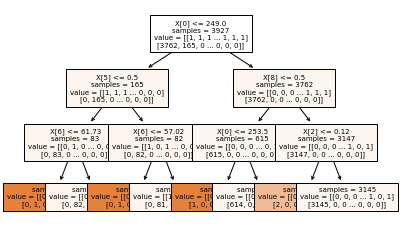

In [4]:
decision_tree = tree.plot_tree(
    decision_tree = mo_DTC,
    #feature_names = labels.tolist(),
    class_names = 'stroke',
    filled = True,
    impurity = False,
    fontsize = 7) 

In [5]:
#print(mo_DTC.score(y_test, predic_DTC))

### Árbol de regresión - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

Subtipo de árboles de decisión que se aplica cuando la variable objetivo es continua.

In [6]:
mo_DTR = tree.DecisionTreeRegressor(random_state=1) 
mo_DTR.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [7]:
predic_DTR = mo_DTR.predict(X_test)
DTR_df = pd.DataFrame(predic_DTR)
#DTR_df.head()
union = pd.concat([y_test, DTR_df], axis = 1)
union

,Unnamed: 0,stroke,0,1
0,0,1,3.0,1.0
1,9,1,10.0,1.0
2,25,1,24.0,1.0
3,30,1,28.0,1.0
4,31,1,33.0,1.0
...,...,...,...,...
977,5086,0,5091.0,0.0
978,5094,0,5090.0,0.0
979,5095,0,5096.0,0.0
980,5101,0,5100.0,0.0


In [8]:
print(mo_DTR.score(X_test, y_test))

0.9881018109464292


Para tener una idea del rendimiento futuro de nuestro modelo, debemos probarlo en los datos del conjunto de prueba, es decir, datos que el modelo nunca ha visto.

Este modelo es capaz de predecir correctamente un 98% aproximadamente de las observaciones del conjusto de prueba. Para afirmar que es un buen modelo, la puntuación debería estar entre 91 y 99%, aproximadamente.

Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden resultar en la generación de un árbol completamente diferente. Además, te dejan con una decisión difícil, un árbol profundo con muchas hojas tiene mucha varianza, pero se ajustan mucho a los datos de entrenamiento, y es aquí donde vemos el sobreajuste porque cada predicción proviene de datos históricos de solo algunos datos en su hoja. Ahora bien, un árbol poco profundo con pocas hojas, tiene poca varianza, pero no consiguen representar la relaciones entre las variables, por lo tanto, tendrá un desempeño deficiente porque no logra capturar tantas distinciones en los datos brutos.

Este método sufre el problema de equilibrio entre sesgo y varianza, esto se soluciona con los métodos de ensamble, los cuales buscan equilibrar. 
___
### Random Forest 

Un modelo Random Forest es un tipo de ensamble en Machine Learning combinando un conjunto de árboles de decisión individuales, donde la predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Al igual que los los árboles de decisión, los bosques tienen dos subtipos: [clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) y [regresión](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).  

In [9]:
from sklearn.ensemble import RandomForestClassifier #ramdom forest
mo_RF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
mo_RF.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

Además de los parámetros utilizados en arboles de decisión, usamos `n_estimators`, el cual configura el número de árboles en el bosque. Cuanto más grande, mejor, pero también más tiempo se tardará en calcular. El Valor por defecto es 100.

In [10]:
predic_RF = mo_RF.predict(X_test)
RF_df= pd.DataFrame(predic_RF)
RF_df.head()

,0,1
0,42,1
1,109,1
2,40,1
3,44,0
4,88,1


In [11]:
#print(mo_RF.score(X_test, y_test))

## Algoritmos basados en Instancia

### Nearest Neighbors 

La idea general de los métodos de Nearest Neighbors es encontrar un número predefinido de muestras de entrenamiento más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean.

El aprendizaje basado en vecinos supervisados se clasifica en: 
- Clasificación, se usa para datos con etiquetas discretas.

    - KNeighborsClassifier, el número de muestras puede ser una constante definida por el usuario - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).
    - RadiusNeighborsClassifier, el número de muestra varia según la densidad local de puntos - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier).
 
- Regresión, usado para datos con etiquetas continuas.

    - KNeighborsRegressor - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
    
    - RadiusNeighborsRegressor - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

 
KNeighbors es la técnica más utilizada. La elección óptima del valor depende en gran medida de los datos, en general, un valor mayor suprime los efectos del ruido, pero hace que los límites de clasificación sean menos distintos. En los casos en los que los datos no se muestrean de manera uniforme, RadiusNeighbors puede ser una mejor opción.

En resumen:

- Calcula la distancia entre el item a clasificar y el resto.
- Seleccionar los k elementos más cercanos.
- Los de una clase que dominen será su clasificación final.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
#mo_KN = KNeighborsClassifier(n_neighbors=5) 
mo_KN = KNeighborsRegressor(n_neighbors=5)
mo_KN.fit(X, y)

KNeighborsRegressor()

El parámetro utlizado en este modelo fue: `n_neighbors`, el cual configura el número de vecinos que se utilizarán para las consultas.

In [13]:
predic_KN = mo_KN.predict(X_test)
KN_df= pd.DataFrame(predic_KN)
KN_df.head()

,0,1
0,19.4,1.0
1,25.6,1.0
2,18.8,1.0
3,29.0,1.0
4,27.2,1.0


In [14]:
print(mo_KN.score(X_test, y_test))

0.9885697974541406


## Regresión lineal 

Estadísticamente, regresión lineal es una aproximación para modelar la relación entre una variable dependiente `y` y una o mas variables `X`.

La regresión lineal es un algoritmo de aprendizaje supervisado, la idea es obtener automáticamente una “recta” que se busca con la tendencia de predicción de un conjunto de datos continuos. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor de salida real. El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima.
___

**Ejercicio** - Predecir el precio de las casas de la ciudad de Windsor (Canadá).
[Fuente](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

Utilizaremos la librería Scikit Learn para este modelo. [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


In [103]:
df_li = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/datos.csv')
df_li.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1
1,2,38500,4000,2,1,1,yes,no,no,no,no,0
2,3,49500,3060,3,1,1,yes,no,no,no,no,0
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0
4,5,61000,6360,2,1,1,yes,no,no,no,no,0


La tabla anterior tiene información sobre las variables variables:

**Variables predictoras**

- lotsize - tamaño del lote
- bedrroms - número de cuartos
- bathrooms - número de baños
- stories - Número de pisos, incluyendo el sótano
- driveway - Si tiene pasador o no
- recreation - Si tiene cuarto de recrecaión o no
- fullbase - Si tiene sótano o no
- gasheat - Si tiene calentador a gas o no
- aircon - Si tiene aire acondicionado o no
- garage - Si tiene garage o no

**Variable objetivo**
- price - Precio 


In [104]:
#driveway
val_driveway={"driveway": {'no':0, 'yes':1}}
df_li.replace(val_driveway, inplace=True)
#recreation
val_recreation={"recreation": {'no':0, 'yes':1}}
df_li.replace(val_recreation, inplace=True)
#fullbase
val_fullbase={"fullbase": {'no':0, 'yes':1}}
df_li.replace(val_fullbase, inplace=True)
#gasheat
val_gasheat={"gasheat": {'no':0, 'yes':1}}
df_li.replace(val_gasheat, inplace=True)
#aircon
val_aircon={"aircon": {'no':0, 'yes':1}}
df_li.replace(val_aircon, inplace=True)
df_li.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage
0,1,42000,5850,3,1,2,1,0,1,0,0,1
1,2,38500,4000,2,1,1,1,0,0,0,0,0
2,3,49500,3060,3,1,1,1,0,0,0,0,0
3,4,60500,6650,3,1,2,1,1,0,0,0,0
4,5,61000,6360,2,1,1,1,0,0,0,0,0


In [105]:
df_li.info() #tipo de variable
df_li.isna().sum() #verificar si hay datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  546 non-null    int64
 1   price       546 non-null    int64
 2   lotsize     546 non-null    int64
 3   bedrooms    546 non-null    int64
 4   bathrooms   546 non-null    int64
 5   stories     546 non-null    int64
 6   driveway    546 non-null    int64
 7   recreation  546 non-null    int64
 8   fullbase    546 non-null    int64
 9   gasheat     546 non-null    int64
 10  aircon      546 non-null    int64
 11  garage      546 non-null    int64
dtypes: int64(12)
memory usage: 51.3 KB


Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrooms     0
stories       0
driveway      0
recreation    0
fullbase      0
gasheat       0
aircon        0
garage        0
dtype: int64

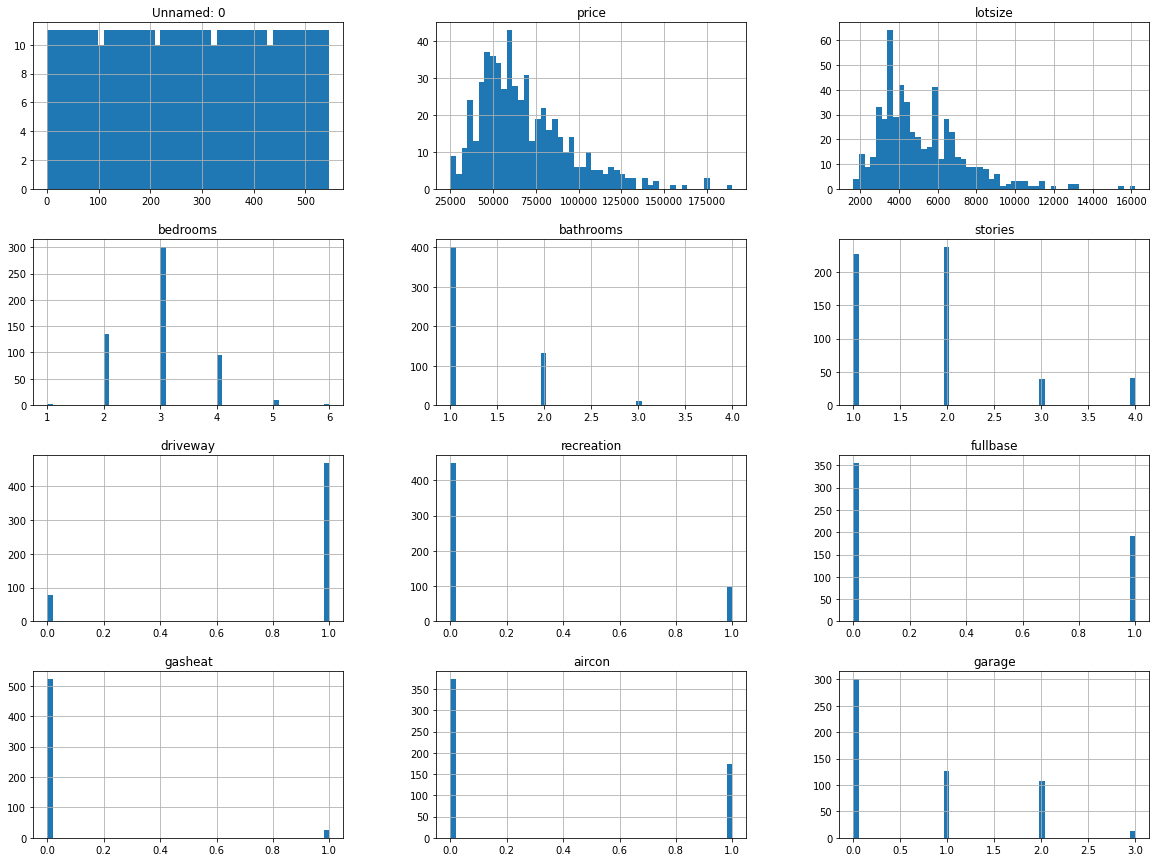

In [106]:
df_li.hist(bins=50,figsize=(20,15))
plt.show()

In [107]:
X_train = df_li.iloc[:,2:11]
y_train = df_li.iloc [:,1]
X_train

,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon
0,5850,3,1,2,1,0,1,0,0
1,4000,2,1,1,1,0,0,0,0
2,3060,3,1,1,1,0,0,0,0
3,6650,3,1,2,1,1,0,0,0
4,6360,2,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,1,1,0,0,1
542,6000,3,2,4,1,0,0,0,1
543,6000,3,2,4,1,1,0,0,1
544,6000,3,2,2,1,1,0,0,1


Estudiemos el grado de correlación entre las características y la variable objetivo por medio de una matriz de correlación. 

Cada celda de la matriz es un coeficiente de correlación (coeficiente de Pearson) entre la variable objetivo y una característica en específico. 

Utilizamos la función corr() de pandas para calcular la matriz.

Para graficar la matriz, usaremos la biblioteca seaborn.

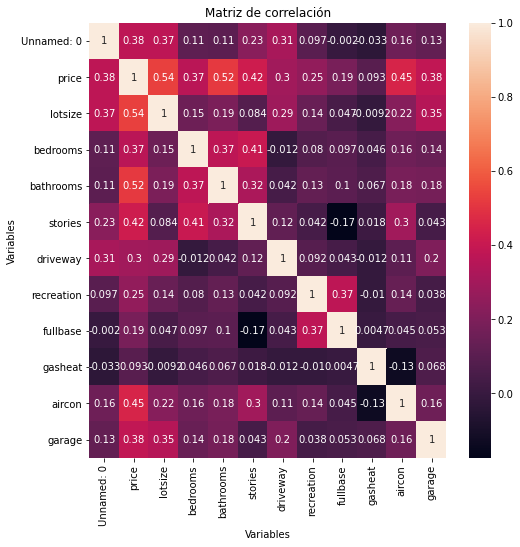

In [108]:
corrmat = df_li.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize = (8,8)) 
sns.heatmap(df_li[top_corr_features].corr( ), annot=True)

plt.title("Matriz de correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

- El valor de los elementos de la diagonal principal son 1, ya que éstos representan la correlación de cada variable consigo misma.
- Un valor positivo cercano a 1, indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.
- Un valor negativo cercano a -1 indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.
- Un valor cercano a 0 (tanto positivo como negativo) indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.


Esta matriz nos muestra que las características que están más relacionadas con la variable objetivo son: 'lotsize', 'bathrooms', 'stories' y 'aircon'. Nos quedaremos con éstas para entrenar nuestro modelo. 

In [109]:
X_train = X_train.iloc[:,[0,1,2,3,8]]
X_train.head()

,lotsize,bedrooms,bathrooms,stories,aircon
0,5850,3,1,2,0
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


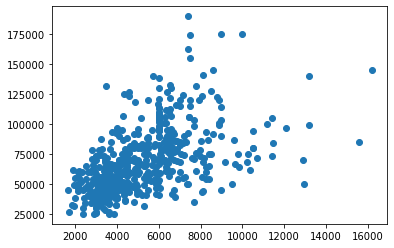

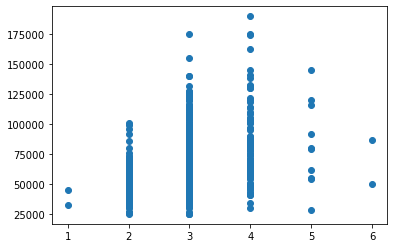

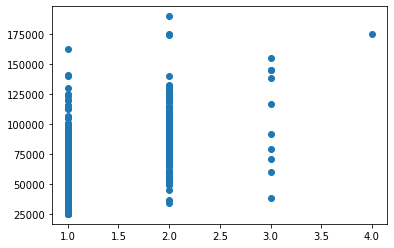

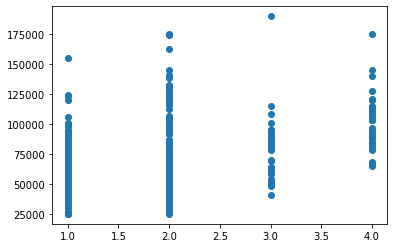

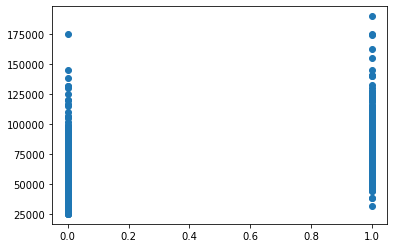

In [110]:
plt.scatter(x=X_train['lotsize'], y=y_train)
plt.show()
plt.scatter(x=X_train['bedrooms'], y=y_train)
plt.show()
plt.scatter(x=X_train['bathrooms'], y=y_train)
plt.show()
plt.scatter(x=X_train['stories'], y=y_train)
plt.show()
plt.scatter(x=X_train['aircon'], y=y_train)
plt.show()


La función `train_test_split` [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) nos divide los datos de forma aleatoria. 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape)

(436, 5) (110, 5)


Ahora que ya tenemos nuestros datos preparados y divididos, definimos el modelo.

In [112]:
from sklearn.linear_model import LinearRegression 
mo_Li = LinearRegression() #no utiliza parámeros porque implementa el método de mínimos cuadrados
mo_Li.fit(X_train, y_train)

LinearRegression()

In [113]:
predic_Li = mo_Li.predict(X_test)
Li_df = pd.DataFrame(predic_Li)
#union = pd.concat([y_test, Li_df], axis = 1)
#union
Li_df.head()

,0
0,41818.747721
1,101029.366400
2,51564.542267
3,45123.463270
4,103294.723084


In [114]:
print(mo_Li.score(X_test, y_test))

0.6151361844552091


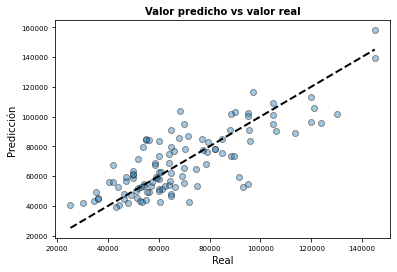

In [115]:
plt.scatter(y_test, predic_Li, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

In [116]:
X_train.to_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/X_train.csv')
y_train.to_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/y_train.csv') 
X_test.to_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/X_test.csv')
y_test.to_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/y_test.csv') 